# Laboratorio 2 - *Gradient Descent*

Universidad Galileo
Algoritmos en la Ciencia de Datos

**Rodrigo Rafael Chang Papa**

**Carné: 19000625**

## Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***
## Problema 1: **Gradient descent** para el problema cuadrático

In [2]:
# Funciones para obtener la función QP y su gradiente
def qp(x, Q, c):
    return (0.5*np.matmul(c.T, np.matmul(Q, c)) + np.matmul(c.T, x))

def qp_grad(x, Q, c):
    return (np.matmul(Q,x) + c)

Si el problema es QP, entonces el método de *step size* exacto es tal que: $$ \alpha_k \triangleq \mathrm{arg}\min_{\alpha \geq 0} f\left(x_k - \alpha_k\nabla f(x_k)\right)
$$. Como se resolvió en clase: $$ \alpha_k = \frac{\nabla f(x_k)^T \nabla f(x_k)}{\nabla f(x_k)^T Q \nabla f(x_k)} $$

In [3]:
# Función de gradiente en descenso para QP
def gradientDescentQP(Q, c, x0, step_size=1, alfa=0.01, N=100, eps=1e-6):
    
    # Funciones para evaluar la función y su gradiente
    f = lambda x: qp(x, Q, c)
    grad_f = lambda x : qp_grad(x, Q, c)
    
    # Asignamos el valor inicial
    x = x0
    
    # Listas para guardar valores útiles
    iterList = []
    gradNormList = []
    solutionList = []
    pkList = []
    
    # Para el número de iteraciones
    for k in range(1, N+1):

        # Guardamos los datos de iteraciones
        iterList.append(k)
        gradNormList.append(np.linalg.norm(grad_f(x)))
        solutionList.append(x.reshape(-1))
        pkList.append(-grad_f(x).reshape(-1))
        
        # Revisamos la norma del vector gradiente
        if np.linalg.norm(grad_f(x)) < eps:
            break
            
        # Dependiendo del parámetro step_size, escogemos alfa
        if (step_size == 0):
            # Learning rate es exacto para el problema QP
            lr = (np.matmul(grad_f(x0).T, grad_f(x0)) / np.matmul(grad_f(x0).T, np.matmul(Q, grad_f(x0))))[0,0]
        elif (step_size == 1):
            # Learning rate es constante e igual a alfa dado
            lr = alfa
        else:
            # Learning rate es variable e igual a 1/k para k>0
            lr = 1/k
            
        # Actualizamos el valor de x_k
        x = x - lr*grad_f(x)
    
    # Generamos un DataFrame con los resultados
    data = {'Iteracion':iterList, 'X_k': solutionList, 'GradNorm':gradNormList, 'P_k':pkList}
    gd_df = pd.DataFrame(data)
    return gd_df

In [4]:
def graficarNormaGrad(gd_df):
    x = gd_df['Iteracion'].values
    y = gd_df['GradNorm'].values
    plt.plot(x, y, 'r-*')
    plt.title('Norma del vector gradiente')
    plt.xlabel('Iteración k')

### Pruebas con la primera matriz $Q_1$ y $c_1$

In [5]:
Q_1 = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c_1 = np.array([1, 0, 1]).reshape(-1, 1)
x_0 = np.array([3, 5, 7]).reshape(-1, 1)

In [6]:
# Se obtienen resultados del GD para los diferentes tipos de step size
exact_step_size = gradientDescentQP(Q_1, c_1, x_0, step_size=0, N=30)
print("Método de step size exacto")
print(exact_step_size.tail(10))

Método de step size exacto
    Iteracion                                                X_k  GradNorm  \
20         21         [-0.994140625, -0.994140625, -0.994140625]  0.008286   
21         22       [-0.9970703125, -0.994140625, -0.9970703125]  0.005859   
22         23      [-0.9970703125, -0.9970703125, -0.9970703125]  0.004143   
23         24    [-0.99853515625, -0.9970703125, -0.99853515625]  0.002930   
24         25   [-0.99853515625, -0.99853515625, -0.99853515625]  0.002072   
25         26  [-0.999267578125, -0.99853515625, -0.999267578...  0.001465   
26         27  [-0.999267578125, -0.999267578125, -0.99926757...  0.001036   
27         28  [-0.9996337890625, -0.999267578125, -0.9996337...  0.000732   
28         29  [-0.9996337890625, -0.9996337890625, -0.999633...  0.000518   
29         30  [-0.99981689453125, -0.9996337890625, -0.99981...  0.000366   

                                           P_k  
20          [-0.005859375, -0.0, -0.005859375]  
21              

In [7]:
const_step_size = gradientDescentQP(Q_1, c_1, x_0, step_size=1, alfa=0.1, N=30)
print("Método de step size constante")
print(const_step_size.tail(10))

Método de step size constante
    Iteracion                                                X_k  GradNorm  \
20         21  [0.5084576788459928, 1.1653053501855135, 0.554...  1.795226   
21         22  [0.4232966780953456, 1.0385475019360368, 0.460...  1.689754   
22         23  [0.3424920926698802, 0.9191866859826405, 0.372...  1.590559   
23         24  [0.2659123427341682, 0.8067992463718819, 0.289...  1.497243   
24         25  [0.19340979882452275, 0.700983048885774, 0.212...  1.409439   
25         26  [0.12482614394819559, 0.6013573454666716, 0.13...  1.326810   
26         27  [0.05999664970522364, 0.5075622624374947, 0.07...  1.249042   
27         28  [-0.0012464539920716278, 0.4192580657106551, 0...  1.175844   
28         29  [-0.05907135662259179, 0.33612430242580144, -0...  1.106944   
29         30  [-0.11364465505549329, 0.2578588831406762, -0....  1.042087   

                                                  P_k  
20  [-0.8516100075064721, -1.2675784824947676, -0....  

In [8]:
var_step_size = gradientDescentQP(Q_1, c_1, x_0, step_size=2, N=30)
print("Método de step size variable")
print(var_step_size.tail(10))

Método de step size variable
    Iteracion                                                X_k  GradNorm  \
20         21  [-0.5887695402953926, -0.41832868516674937, -0...  0.481829   
21         22  [-0.6002357119418671, -0.4345611475599535, -0....  0.468389   
22         23  [-0.6108761539271498, -0.44962247159467295, -0...  0.455917   
23         24  [-0.6207835523506443, -0.4636445309279318, -0....  0.444306   
24         25  [-0.6300367784434211, -0.4767394493798245, -0....  0.433461   
25         26  [-0.6387034141431404, -0.4890032357049122, -0....  0.423304   
26         27  [-0.6468417375053954, -0.5005186340463144, -0....  0.413767   
27         28  [-0.6545022989511555, -0.5113573824506907, -0....  0.404790   
28         29  [-0.6617291841135977, -0.5215820193435811, -0....  0.396322   
29         30  [-0.6685610341520938, -0.5312473410518581, -0....  0.388316   

                                                  P_k  
20  [-0.2407896045759641, -0.34088171025728653, -0...  


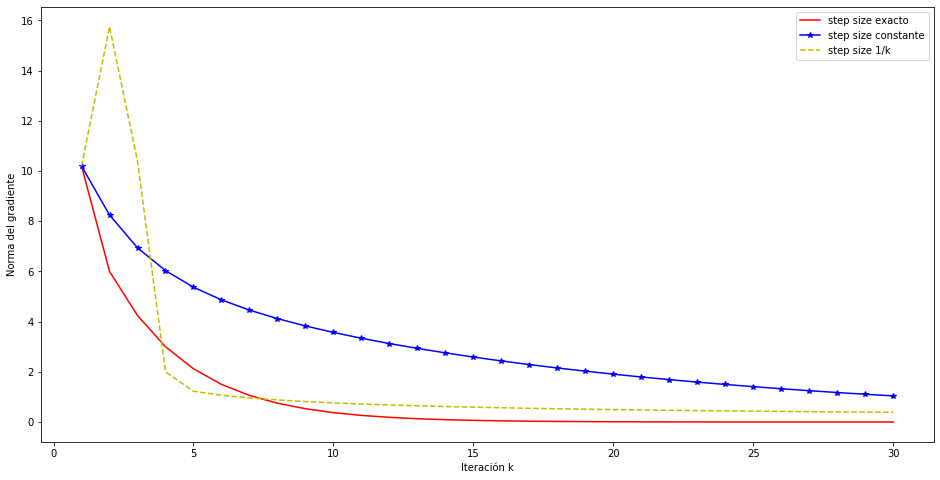

In [9]:
k = exact_step_size['Iteracion'].values

plt.figure(figsize=(16,8))
plt.plot(k, exact_step_size['GradNorm'].values, 'r-', label='step size exacto')
plt.plot(k, const_step_size['GradNorm'].values, 'b-*', label='step size constante')
plt.plot(k, var_step_size['GradNorm'].values, 'y--', label='step size 1/k')
plt.xlabel('Iteración k')
plt.ylabel('Norma del gradiente')
plt.legend();

### Pruebas con la primera matriz $Q_2$ y $c_2$

In [15]:
Q_2 = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c_2 = np.array([1, 0, 1]).reshape(-1, 1)
x_0 = np.array([-1, 2, -3]).reshape(-1, 1)

In [16]:
# Se obtienen resultados del GD para los diferentes tipos de step size
exact_step_size = gradientDescentQP(Q_2, c_2, x_0, step_size=0, N=30)
print("Método de step size exacto")
print(exact_step_size.tail(10))

Método de step size exacto
    Iteracion                                                X_k  GradNorm  \
20         21  [-0.9885766021869596, -0.9838448886278748, -0....  0.013383   
21         22  [-0.9905973583230551, -0.9867026616652448, -0....  0.011016   
22         23  [-0.9922606486506156, -0.9890549063565081, -0....  0.009067   
23         24  [-0.9936297088108724, -0.9909910485956653, -0....  0.007463   
24         25  [-0.9947565874713138, -0.992584695202318, -0.9...  0.006143   
25         26  [-0.9956841257675569, -0.9938964322511421, -0....  0.005056   
26         27  [-0.996447586280813, -0.9949761283883376, -0.9...  0.004162   
27         28  [-0.9970759937334338, -0.9958648307008323, -0....  0.003426   
28         29  [-0.9975932384724033, -0.9965963252139876, -0....  0.002820   
29         30  [-0.9980189847319084, -0.9971984213436512, -0....  0.002321   

                                                  P_k  
20  [-0.006691684253955499, -0.00946344514014319, ...  
21

In [17]:
const_step_size = gradientDescentQP(Q_2, c_2, x_0, step_size=1, alfa=0.1, N=30)
print("Método de step size constante")
print(const_step_size.tail(10))

Método de step size constante
    Iteracion                                                X_k  GradNorm  \
20         21  [-0.8211973089453638, -0.7623996465704215, -0....  0.199108   
21         22  [-0.8331978118133332, -0.7764650220546236, -0....  0.186737   
22         23  [-0.844204751656129, -0.7896562544137365, -0.8...  0.175318   
23         24  [-0.8543294267662769, -0.8020416933881118, -0....  0.164721   
24         25  [-0.8636677107518327, -0.8136798316844622, -0....  0.154850   
25         26  [-0.8723021517699123, -0.8246218807945103, -0....  0.145628   
26         27  [-0.8803039094953808, -0.8349135136268498, -0....  0.136994   
27         28  [-0.8877344789589896, -0.8445960557103633, -0....  0.128899   
28         29  [-0.894647188738228, -0.8537073106879345, -0.8...  0.121301   
29         30  [-0.9010884820593759, -0.8622821425602699, -0....  0.114163   

                                                  P_k  
20  [-0.12000502867969387, -0.1406537548420217, -0...  

In [18]:
var_step_size = gradientDescentQP(Q_2, c_2, x_0, step_size=2, N=30)
print("Método de step size variable")
print(var_step_size.tail(10))

Método de step size variable
    Iteracion                                                X_k  GradNorm  \
20         21  [-0.9549111731983391, -0.9364188160882322, -0....  0.052750   
21         22  [-0.9561776717550797, -0.9381799929558614, -0....  0.051279   
22         23  [-0.9573515194571571, -0.9398161455739722, -0....  0.049913   
23         24  [-0.958443393659751, -0.9413409606942491, -0.9...  0.048641   
24         25  [-0.9594623175503654, -0.9427661634413742, -0....  0.047454   
25         26  [-0.9604159786839911, -0.9441018557700935, -0....  0.046342   
26         27  [-0.96131097477638, -0.9453567883019318, -0.96...  0.045298   
27         28  [-0.9621530058411641, -0.9465385798926317, -0....  0.044315   
28         29  [-0.9629470261343893, -0.9476538960318126, -0....  0.043388   
29         30  [-0.9636973655744939, -0.9487085946595765, -0....  0.042511   

                                                  P_k  
20  [-0.026596469691554048, -0.036984714220213766,...  


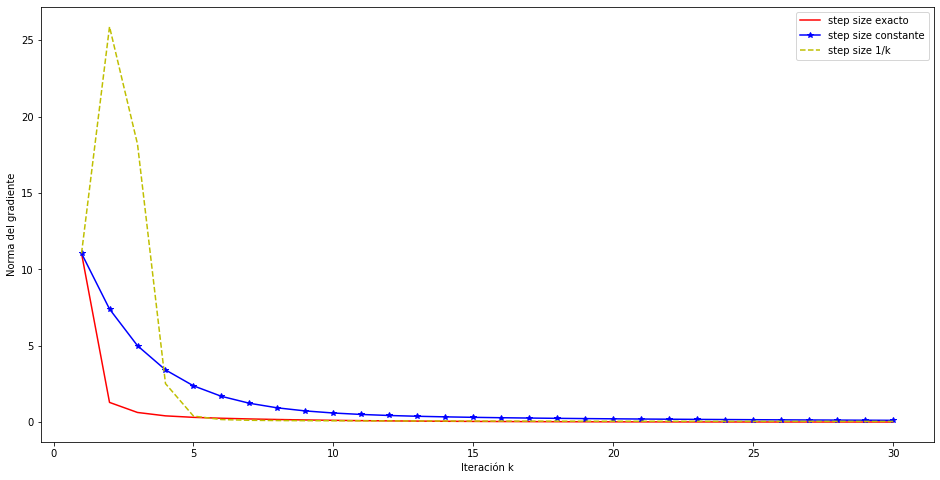

In [19]:
k = exact_step_size['Iteracion'].values

plt.figure(figsize=(16,8))
plt.plot(k, exact_step_size['GradNorm'].values, 'r-', label='step size exacto')
plt.plot(k, const_step_size['GradNorm'].values, 'b-*', label='step size constante')
plt.plot(k, var_step_size['GradNorm'].values, 'y--', label='step size 1/k')
plt.xlabel('Iteración k')
plt.ylabel('Norma del gradiente')
plt.legend();

## Conclusiones
Para el primer conjunto de ejercicios, en general, se observa que la mejor elección de $\alpha_k$ para cada iteración es la que se obtiene como resultado del problema de optimización, es decir, el método de selección exacta. Por otra parte, cuando se escoge $\alpha_k = 0.5$, se obtienen resultados muy similares a los obtenidos con el método exacto. En este sentido, esto da lugar a la idea de que para un determinado problema, es posible encontrar un *step size* (o *learning rate*) ideal para el algoritmo de gradiente en descenso.

Como se observa en el segundo conjunto de ejercicios, la elección del punto inicial del algoritmo de gradiente en descenso puede mejorar el desempeño del algoritmo a pesar de las diferentes elecciones de $\alpha_k$. En este caso, se puede observar que las 3 variantes convergen más o menos en la misma cantidad de iteraciones a los mismos valores de magnitud para el vector gradiente.

***
## Problema 2: **Rosenbrock's Function**: función banana

In [44]:
# Definimos la función Rosenbrock y su gradiente

f = lambda x : 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
grad_f = lambda x : np.array([-400*(x[1] - x[0]**2)*(x[0]) - 2*(1-x[0]), 200*(x[1] - x[0]**2)]).reshape(-1, 1)

In [45]:
x0 = np.array([0, 0.]).reshape(-1, 1)
print('Función en x0: ', f(x0))
print('Gradiente: \n', grad_f(x0))

Función en x0:  [1.]
Gradiente: 
 [[-2.]
 [ 0.]]


In [46]:
# Función de gradiente en descenso más general, para una función y su gradiente
def gradientDescent_fn(f, grad_f, x0, step_size=1, alfa=0.01, N=100, eps=1e-6):
    
    # Asignamos el valor inicial
    x = x0
    
    # Listas para guardar valores útiles
    iterList = []
    gradNormList = []
    solutionList = []
    pkList = []
    
    # Para el número de iteraciones
    for k in range(1, N+1):

        # Guardamos los datos de iteraciones
        iterList.append(k)
        gradNormList.append(np.linalg.norm(grad_f(x)))
        solutionList.append(x.reshape(-1))
        pkList.append(-grad_f(x).reshape(-1))
        
        # Revisamos la norma del vector gradiente
        if np.linalg.norm(grad_f(x)) < eps:
            break
            
        # Dependiendo del parámetro step_size, escogemos alfa
        if (step_size == 1):
            # Learning rate es constante e igual a alfa dado
            lr = alfa
        else:
            # Learning rate es variable e igual a 1/k para k>0
            lr = 1/k
            
        # Actualizamos el valor de x_k
        x = x - lr*grad_f(x)
    
    # Generamos un DataFrame con los resultados
    data = {'Iteracion':iterList, 'X_k': solutionList, 'GradNorm':gradNormList, 'P_k':pkList}
    gd_df = pd.DataFrame(data)
    return gd_df

In [60]:
# Llamamos a nuestra función de gradiente en descenso con los parámetros especificados
x0 = np.array([0, 0.]).reshape(-1, 1)
gdResult = gradientDescent_fn(f, grad_f, x0, alfa=0.05, N=1000, eps=1e-8)
print(gdResult)

     Iteracion                                                X_k  \
0            1                                         [0.0, 0.0]   
1            2                                         [0.1, 0.0]   
2            3         [0.16999999999999998, 0.10000000000000003]   
3            4          [0.4947400000000001, -0.6110000000000004]   
4            5           [-7.922383917368489, 7.9466766760000045]   
5            6             [8678.673918712371, 556.1215792577889]   
6            7           [-13073350411199.658, 753188804.7791702]   
7            8    [4.468797768308575e+40, 1.7091249097401427e+27]   
8            9  [-1.7848515473388867e+123, 1.9970153494039706e...   
9           10                      [inf, 3.185695046038018e+247]   
10          11                                         [nan, inf]   
11          12                                         [nan, nan]   
12          13                                         [nan, nan]   
13          14                    

C:\Users\RRCP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Users\RRCP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in subtract


Como podemos observar, el algoritmo no converge. Esto se debe posiblemente al tamaño del paso $\alpha_k = 0.05$, así como a la escala pobre del problema. Es por esto que la función es utilizada como *benchmark* (marco de referencia) para la prueba de algoritmos de optimización.

### Modificación hacia la convergencia
Después de variar el punto inicial y disminuir el tamaño del paso (*learning rate*), podemos ver que el algoritmo empieza a converger a la solución global, aunque muy lentamente.

In [62]:
x0 = np.array([0.9, 1.1]).reshape(-1, 1)
gdResult = gradientDescent_fn(f, grad_f, x0, alfa=0.0001, N=1000, eps=1e-8)
print(gdResult)

     Iteracion                                       X_k    GradNorm  \
0            1                                [0.9, 1.1]  119.604181   
1            2                         [0.91046, 1.0942]  110.370330   
2            3  [0.9201383470493866, 1.0888947482320002]  101.611170   
3            4   [0.929070098183671, 1.0840499448215757]   93.341877   
4            5  [0.9372927558903064, 1.0796323708719244]   85.569695   
5            6  [0.9448454299195073, 1.0756100776593749]   78.294841   
6            7   [0.9517680879679374, 1.071952533834983]   71.511467   
7            8   [0.9581009023637481, 1.068630733023766]   65.208647   
8            9  [0.9638836947701062, 1.0656172651454954]   59.371335   
9           10  [0.9691554768141831, 1.0628863553834589]   53.981261   
10          11   [0.973954081450076, 1.0604138750405683]   49.017759   
11          12   [0.9783158777113811, 1.058177328595222]   44.458495   
12          13  [0.9822755601872761, 1.0561558211549613]   40.28